Emotion Prediction using Audio Data

Converting text to audio

In [1]:
!pip install gTTS

In [ ]:

import os
import pandas as pd
import time
from gtts import gTTS

# Load dataset (use the path you uploaded)
data_path = "/content/Emotions_DS-3E.xlsx"  # Update with your dataset path if needed
output_dir = "audio_outputs_gtts"
os.makedirs(output_dir, exist_ok=True)

# Read the Excel file
try:
    df = pd.read_excel(data_path)
except Exception as e:
    raise ValueError(f"Error reading the Excel file: {e}")

# Ensure 'Utterance' column exists
if 'Utterance' not in df.columns:
    raise ValueError("The dataset must contain a column named 'Utterance'.")

# Function to convert text to audio using gTTS with delay to handle rate limits
def convert_with_gtts(text, filename):
    try:
        tts = gTTS(text=text, lang='en')  # Specify language as needed
        tts.save(filename)
        print(f"Audio saved for: {text[:30]}...")  # Print a message for tracking
    except Exception as e:
        print(f"Error converting text to audio for '{text}': {e}")

# Convert each utterance in the dataset to audio with a delay
for index, row in df.iterrows():
    utterance = row['Utterance']
    output_path = os.path.join(output_dir, f"utterance_{index}.mp3")

    # Convert and save audio
    convert_with_gtts(utterance, output_path)

    # Add a delay to prevent hitting rate limits
    time.sleep(1.5)  # Adjust delay as needed

print(f"Audio files generated in '{output_dir}' for all samples.")


Audio saved for: Hi. Alvina, how are you doing ...
Audio saved for: I'm just tired....
Audio saved for: just tired?...
Audio saved for: Yeah...
Audio saved for: you know, we did some pre visi...
Audio saved for: Well, I knew I felt different....
Audio saved for: But you knew something was som...
Audio saved for: I didn't feel like myself. I h...
Audio saved for: Tell me a little bit more abou...
Audio saved for: I mean, I just go to work, and...
Audio saved for: So you sleep a lot. But even t...
Audio saved for: No, not at all....
Audio saved for: Doesn't sound like good qualit...
Audio saved for: No. I just have no energy. I d...
Audio saved for: How long has that been going o...
Audio saved for: I guess a couple months....
Audio saved for: Two or three months?...
Audio saved for: Yeah....
Audio saved for: What else is going on?...
Audio saved for: Well, you know, I been drinkin...
Audio saved for: And that's where its increased...
Audio saved for: It is Because I don't usually ...
Au

KeyboardInterrupt: 

In [4]:
df=pd.read_excel(data_path)

In [5]:
df.head()

,ID,Type,Utterance,Dialogue_Act,Emotion
0,194_0,T,"Hi. Alvina, how are you doing today? It's good...",gt,0
1,194_1,P,I'm just tired.,gt,-1
2,194_2,T,just tired?,crq,0
3,194_3,P,Yeah,cd,-1
4,194_4,T,"you know, we did some pre visit planning with ...","gc, irq",0


In [6]:
print(df.columns)


Index(['ID', 'Type', 'Utterance', 'Dialogue_Act', 'Emotion'], dtype='object')


In [9]:
!pip install pydub

Function to extract MFCC features

Converted audio_outputs_gtts/utterance_1053.mp3 to audio_outputs_gtts/utterance_1053.wav
MFCCs saved for audio_outputs_gtts/utterance_1053.wav
MFCC Coefficients (shape): (13, 508)
[[-5.65649995e+02 -5.65649995e+02 -5.65615115e+02 ... -5.65562185e+02
  -5.65447879e+02 -5.65558676e+02]
 [ 0.00000000e+00  0.00000000e+00  4.92355401e-02 ...  1.24173055e-01
   2.85814235e-01  1.29135527e-01]
 [ 0.00000000e+00  0.00000000e+00  4.89573982e-02 ...  1.24145004e-01
   2.85749670e-01  1.29106355e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  4.03301266e-02 ...  1.23248496e-01
   2.83686140e-01  1.28174019e-01]
 [ 0.00000000e+00  0.00000000e+00  3.85124953e-02 ...  1.23052673e-01
   2.83235406e-01  1.27970370e-01]
 [ 0.00000000e+00  0.00000000e+00  3.65499117e-02 ...  1.22838319e-01
   2.82742018e-01  1.27747449e-01]]


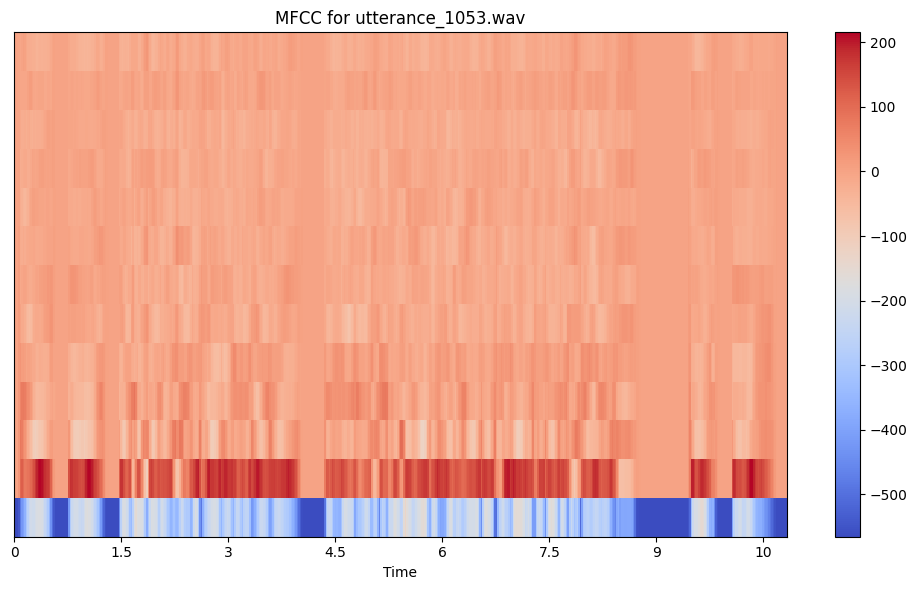

Converted audio_outputs_gtts/utterance_328.mp3 to audio_outputs_gtts/utterance_328.wav
MFCCs saved for audio_outputs_gtts/utterance_328.wav
Converted audio_outputs_gtts/utterance_841.mp3 to audio_outputs_gtts/utterance_841.wav
MFCCs saved for audio_outputs_gtts/utterance_841.wav
Converted audio_outputs_gtts/utterance_1059.mp3 to audio_outputs_gtts/utterance_1059.wav
MFCCs saved for audio_outputs_gtts/utterance_1059.wav
Converted audio_outputs_gtts/utterance_254.mp3 to audio_outputs_gtts/utterance_254.wav
MFCCs saved for audio_outputs_gtts/utterance_254.wav
Error converting audio_outputs_gtts/utterance_1190.mp3: Decoding failed. ffmpeg returned error code: 1

Output from ffmpeg/avlib:

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --en

In [11]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
from pydub import AudioSegment
import soundfile as sf
import librosa.display

# Define the directory containing the audio files and MFCC output directory
audio_dir = "audio_outputs_gtts"
mfcc_output_dir = "Mfcc_Outputs"
os.makedirs(mfcc_output_dir, exist_ok=True)

# Function to convert mp3 to wav (if needed)
def convert_mp3_to_wav(mp3_path, wav_path):
    try:
        sound = AudioSegment.from_mp3(mp3_path)
        sound.export(wav_path, format="wav")
        print(f"Converted {mp3_path} to {wav_path}")
    except Exception as e:
        print(f"Error converting {mp3_path}: {e}")

# Function to extract and save MFCC features
def extract_mfcc(audio_path, output_path, n_mfcc=13, plot=False):
    try:
        # Load the audio file
        y, sr = sf.read(audio_path)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        # Save the MFCC features as a .npy file
        np.save(output_path, mfccs)
        print(f"MFCCs saved for {audio_path}")

        # Plot MFCC only for one specified file
        if plot:
            print("MFCC Coefficients (shape):", mfccs.shape)
            print(mfccs)

            plt.figure(figsize=(10, 6))
            librosa.display.specshow(mfccs, x_axis='time', sr=sr)
            plt.colorbar()
            plt.title(f'MFCC for {os.path.basename(audio_path)}')
            plt.tight_layout()
            plt.show()

    except FileNotFoundError:
        print(f"File not found: {audio_path}")
    except librosa.util.exceptions.ParameterError:
        print(f"Error loading audio file (parameter issue): {audio_path}")
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")

# Process each audio file in the directory
plot_done = False  # To ensure only one plot is generated
for audio_file in os.listdir(audio_dir):
    if audio_file.endswith(".mp3"):
        audio_path = os.path.join(audio_dir, audio_file)

        # Convert to WAV if not already done
        wav_path = os.path.join(audio_dir, f"{os.path.splitext(audio_file)[0]}.wav")
        if not os.path.exists(wav_path):
            convert_mp3_to_wav(audio_path, wav_path)

        # Set output path for MFCC features
        mfcc_output_path = os.path.join(mfcc_output_dir, f"{os.path.splitext(audio_file)[0]}.npy")

        # Extract MFCC and plot for the first file only
        extract_mfcc(wav_path, mfcc_output_path, plot=not plot_done)
        plot_done = True  # Prevent further plots after the first file

print(f"MFCC features generated and saved in '{mfcc_output_dir}'.")


Saving audio and mfcc's to desktop

In [7]:
import shutil

# Path to the folder you want to download
folder_path = '/content/audio_outputs_gtts'

# Path to save the zipped folder
zip_file_path = '/content/Audio_Outputs_gtts.zip'

# Zip the folder
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)

# Download the zip file
from google.colab import files
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import shutil

# Path to the folder you want to download
folder_path = '/content/Mfcc_Outputs'

# Path to save the zipped folder
zip_file_path = '/content/audio_outputs_mfccs.zip'

# Zip the folder
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_path)

# Download the zip file
from google.colab import files
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Updated CSV File

In [17]:
import os
import pandas as pd

# Load the Excel file
data_path = "/content/Emotions_DS-3E.xlsx"  # Update with your dataset path if needed
df = pd.read_excel(data_path)

# Define directories
audio_dir = "/content/audio_outputs_gtts"
mfcc_output_dir = "/content/Mfcc_Outputs"
output_csv_path = "/content/Emotions_DS_with_audio_paths_and_mfcc.csv"  # Path to save the new CSV file

# Check if the necessary columns exist
if 'Utterance' not in df.columns:
    raise ValueError("The dataset must contain a column named 'Utterance'.")

# Function to generate the corresponding file paths
def generate_paths(index):
    audio_path = os.path.join(audio_dir, f"utterance_{index}.mp3")
    mfcc_path = os.path.join(mfcc_output_dir, f"utterance_{index}.npy")
    return audio_path, mfcc_path

# Add 'AudioPath' and 'MFCCPath' columns to the DataFrame
audio_paths = []
mfcc_paths = []

for index in df.index:
    audio_path, mfcc_path = generate_paths(index)

    # Check if the corresponding audio and MFCC files exist
    if os.path.exists(audio_path) and os.path.exists(mfcc_path):
        audio_paths.append(audio_path)
        mfcc_paths.append(mfcc_path)
    else:
        audio_paths.append(None)  # Assign None if file doesn't exist
        mfcc_paths.append(None)  # Assign None if file doesn't exist

# Add the new columns to the DataFrame
df['AudioPath'] = audio_paths
df['MFCCPath'] = mfcc_paths

# Save the updated DataFrame to a new CSV file
df.to_csv(output_csv_path, index=False)

print(f"New CSV file with audio and MFCC paths created: {output_csv_path}")


New CSV file with audio and MFCC paths created: /content/Emotions_DS_with_audio_paths_and_mfcc.csv


In [19]:
df=pd.read_csv("/content/Emotions_DS_with_audio_paths_and_mfcc.csv")

In [20]:
df.head()

,ID,Type,Utterance,Dialogue_Act,Emotion,AudioPath,MFCCPath
0,194_0,T,"Hi. Alvina, how are you doing today? It's good...",gt,0,/content/audio_outputs_gtts/utterance_0.mp3,/content/Mfcc_Outputs/utterance_0.npy
1,194_1,P,I'm just tired.,gt,-1,/content/audio_outputs_gtts/utterance_1.mp3,/content/Mfcc_Outputs/utterance_1.npy
2,194_2,T,just tired?,crq,0,/content/audio_outputs_gtts/utterance_2.mp3,/content/Mfcc_Outputs/utterance_2.npy
3,194_3,P,Yeah,cd,-1,/content/audio_outputs_gtts/utterance_3.mp3,/content/Mfcc_Outputs/utterance_3.npy
4,194_4,T,"you know, we did some pre visit planning with ...","gc, irq",0,/content/audio_outputs_gtts/utterance_4.mp3,/content/Mfcc_Outputs/utterance_4.npy


In [22]:
df.isnull().sum()

,0
ID,0
Type,0
Utterance,0
Dialogue_Act,0
Emotion,0
AudioPath,839
MFCCPath,839


In [23]:
# Select the first 1168 rows of the dataset
df_cleaned = df.head(1168)

# Verify if there are any null values in the selected rows
print(df_cleaned.isnull().sum())  # Ensure no null values in the selected rows


ID              0
Type            0
Utterance       0
Dialogue_Act    0
Emotion         0
AudioPath       5
MFCCPath        5
dtype: int64


In [24]:
# Drop rows with null values
df_cleaned = df_cleaned.dropna()

# Verify if there are any null values left
print(df_cleaned.isnull().sum())  # Should print 0 if all null values are dropped


ID              0
Type            0
Utterance       0
Dialogue_Act    0
Emotion         0
AudioPath       0
MFCCPath        0
dtype: int64


In [25]:
df_cleaned.shape

(1163, 7)

In [28]:
df_cleaned.head()

,ID,Type,Utterance,Dialogue_Act,Emotion,AudioPath,MFCCPath
0,194_0,T,"Hi. Alvina, how are you doing today? It's good...",gt,0,/content/audio_outputs_gtts/utterance_0.mp3,/content/Mfcc_Outputs/utterance_0.npy
1,194_1,P,I'm just tired.,gt,-1,/content/audio_outputs_gtts/utterance_1.mp3,/content/Mfcc_Outputs/utterance_1.npy
2,194_2,T,just tired?,crq,0,/content/audio_outputs_gtts/utterance_2.mp3,/content/Mfcc_Outputs/utterance_2.npy
3,194_3,P,Yeah,cd,-1,/content/audio_outputs_gtts/utterance_3.mp3,/content/Mfcc_Outputs/utterance_3.npy
4,194_4,T,"you know, we did some pre visit planning with ...","gc, irq",0,/content/audio_outputs_gtts/utterance_4.mp3,/content/Mfcc_Outputs/utterance_4.npy


In [26]:
# Drop rows with null values from the DataFrame
df_cleaned = df_cleaned.dropna()

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('/content/cleaned_data.csv', index=False)

# Verify the file has been saved correctly
print("Cleaned data saved as 'cleaned_data.csv'.")


Cleaned data saved as 'cleaned_data.csv'.


Model Training and Predictions

Train-Test Split

In [29]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your cleaned dataset
data_path = "/content/cleaned_data.csv"  # Update this path
df = pd.read_csv(data_path)

# Check if 'ID' and 'MFCCPath' columns exist in the dataset
print(f"Columns in dataset: {df.columns}")
if 'ID' not in df.columns or 'MFCCPath' not in df.columns:
    raise ValueError("The dataset must contain 'ID' and 'MFCCPath' columns.")

# Prepare features and labels
features = []
labels = []

# Iterate over each row and load the corresponding MFCC file based on 'MFCCPath' column
for index, row in df.iterrows():
    mfcc_file_path = row['MFCCPath']  # Use the MFCCPath column for file paths
    print(f"Checking file: {mfcc_file_path}")  # Debugging: print the path being checked

    try:
        if pd.notnull(mfcc_file_path) and os.path.exists(mfcc_file_path):
            mfcc_features = np.load(mfcc_file_path)
            features.append(mfcc_features)
            labels.append(row['Emotion'])
        else:
            print(f"MFCC file not found for ID {row['ID']} at {mfcc_file_path}")
    except Exception as e:
        print(f"Error loading MFCC file for ID {row['ID']}: {e}")

# Check if features and labels are populated
print(f"Features length: {len(features)}")
print(f"Labels length: {len(labels)}")

Columns in dataset: Index(['ID', 'Type', 'Utterance', 'Dialogue_Act', 'Emotion', 'AudioPath',
       'MFCCPath'],
      dtype='object')
Checking file: /content/Mfcc_Outputs/utterance_0.npy
Checking file: /content/Mfcc_Outputs/utterance_1.npy
Checking file: /content/Mfcc_Outputs/utterance_2.npy
Checking file: /content/Mfcc_Outputs/utterance_3.npy
Checking file: /content/Mfcc_Outputs/utterance_4.npy
Checking file: /content/Mfcc_Outputs/utterance_5.npy
Checking file: /content/Mfcc_Outputs/utterance_6.npy
Checking file: /content/Mfcc_Outputs/utterance_7.npy
Checking file: /content/Mfcc_Outputs/utterance_8.npy
Checking file: /content/Mfcc_Outputs/utterance_9.npy
Checking file: /content/Mfcc_Outputs/utterance_10.npy
Checking file: /content/Mfcc_Outputs/utterance_11.npy
Checking file: /content/Mfcc_Outputs/utterance_12.npy
Checking file: /content/Mfcc_Outputs/utterance_13.npy
Checking file: /content/Mfcc_Outputs/utterance_14.npy
Checking file: /content/Mfcc_Outputs/utterance_15.npy
Checking f

In [56]:
# Filter sequences that have a length of 224
features_filtered = [x for x in features if len(x) == 13]

In [57]:
len(features_filtered)

1163

In [71]:
for idx, seq in enumerate(features_filtered):
    print(f"Sequence {idx} length: {len(seq)}")

Sequence 0 length: 13
Sequence 1 length: 13
Sequence 2 length: 13
Sequence 3 length: 13
Sequence 4 length: 13
Sequence 5 length: 13
Sequence 6 length: 13
Sequence 7 length: 13
Sequence 8 length: 13
Sequence 9 length: 13
Sequence 10 length: 13
Sequence 11 length: 13
Sequence 12 length: 13
Sequence 13 length: 13
Sequence 14 length: 13
Sequence 15 length: 13
Sequence 16 length: 13
Sequence 17 length: 13
Sequence 18 length: 13
Sequence 19 length: 13
Sequence 20 length: 13
Sequence 21 length: 13
Sequence 22 length: 13
Sequence 23 length: 13
Sequence 24 length: 13
Sequence 25 length: 13
Sequence 26 length: 13
Sequence 27 length: 13
Sequence 28 length: 13
Sequence 29 length: 13
Sequence 30 length: 13
Sequence 31 length: 13
Sequence 32 length: 13
Sequence 33 length: 13
Sequence 34 length: 13
Sequence 35 length: 13
Sequence 36 length: 13
Sequence 37 length: 13
Sequence 38 length: 13
Sequence 39 length: 13
Sequence 40 length: 13
Sequence 41 length: 13
Sequence 42 length: 13
Sequence 43 length: 1

In [74]:
for idx, seq in enumerate(features_filtered):
    print(f"Sequence {idx} shape after flattening: {np.shape(seq)}")

Sequence 0 shape after flattening: (13, 224)
Sequence 1 shape after flattening: (13, 64)
Sequence 2 shape after flattening: (13, 55)
Sequence 3 shape after flattening: (13, 33)
Sequence 4 shape after flattening: (13, 1144)
Sequence 5 shape after flattening: (13, 210)
Sequence 6 shape after flattening: (13, 136)
Sequence 7 shape after flattening: (13, 235)
Sequence 8 shape after flattening: (13, 174)
Sequence 9 shape after flattening: (13, 472)
Sequence 10 shape after flattening: (13, 230)
Sequence 11 shape after flattening: (13, 87)
Sequence 12 shape after flattening: (13, 128)
Sequence 13 shape after flattening: (13, 250)
Sequence 14 shape after flattening: (13, 111)
Sequence 15 shape after flattening: (13, 96)
Sequence 16 shape after flattening: (13, 77)
Sequence 17 shape after flattening: (13, 33)
Sequence 18 shape after flattening: (13, 88)
Sequence 19 shape after flattening: (13, 614)
Sequence 20 shape after flattening: (13, 101)
Sequence 21 shape after flattening: (13, 301)
Seque

In [77]:
max_second_dim = max(len(seq[0]) for seq in features_filtered)

# Pad sequences to have the same second dimension
features_filtered_padded = [np.pad(seq, ((0, 0), (0, max_second_dim - seq.shape[1])), mode='constant') for seq in features_filtered]

In [78]:
for idx, seq in enumerate(features_filtered_padded):
    print(f"Sequence {idx} shape after flattening: {np.shape(seq)}")

Sequence 0 shape after flattening: (13, 4691)
Sequence 1 shape after flattening: (13, 4691)
Sequence 2 shape after flattening: (13, 4691)
Sequence 3 shape after flattening: (13, 4691)
Sequence 4 shape after flattening: (13, 4691)
Sequence 5 shape after flattening: (13, 4691)
Sequence 6 shape after flattening: (13, 4691)
Sequence 7 shape after flattening: (13, 4691)
Sequence 8 shape after flattening: (13, 4691)
Sequence 9 shape after flattening: (13, 4691)
Sequence 10 shape after flattening: (13, 4691)
Sequence 11 shape after flattening: (13, 4691)
Sequence 12 shape after flattening: (13, 4691)
Sequence 13 shape after flattening: (13, 4691)
Sequence 14 shape after flattening: (13, 4691)
Sequence 15 shape after flattening: (13, 4691)
Sequence 16 shape after flattening: (13, 4691)
Sequence 17 shape after flattening: (13, 4691)
Sequence 18 shape after flattening: (13, 4691)
Sequence 19 shape after flattening: (13, 4691)
Sequence 20 shape after flattening: (13, 4691)
Sequence 21 shape after

In [79]:
features_padded = pad_sequences(features_filtered_padded, padding='post', maxlen=224)

In [80]:
features_1 = np.array(features_filtered_padded)
labels_1 = [x for x in labels if isinstance(x, (int, float)) and not np.isnan(x)]

In [81]:
features_1.shape

(1163, 13, 4691)

In [83]:
features[0].shape

(13, 224)

In [82]:
X = np.array(features_1)
y = np.array(labels_1)

In [84]:
print("Length of X (features):", len(X))
print("Length of y (labels):", len(y))

Length of X (features): 1163
Length of y (labels): 1163


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df['Emotion'].value_counts()

,count
Emotion,
0,1477
-1,499
1,26


Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_flat, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_flat)

# Evaluate the model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.7467811158798283
              precision    recall  f1-score   support

          -1       0.59      0.26      0.36        62
           0       0.77      0.93      0.84       169
           1       0.00      0.00      0.00         2

    accuracy                           0.75       233
   macro avg       0.45      0.40      0.40       233
weighted avg       0.71      0.75      0.71       233



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting (XGBoost)

In [ ]:
# Check unique values in y
unique_labels = np.unique(y)
print(f"Unique labels in the dataset: {unique_labels}")

Unique labels in the dataset: [-1  0  1]


In [ ]:
# Map your emotion labels to a range starting from 0

label_mapping = {value: idx for idx, value in enumerate(sorted(set(y)))}
y_mapped = np.vectorize(label_mapping.get)(y)

# Check the unique values of the new labels
print(f"Mapped labels: {np.unique(y_mapped)}")


Mapped labels: [0 1 2]


In [95]:
# Split the data into training and testing sets using the mapped labels
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [96]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_flat, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_flat)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:47:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.44      0.51        62
           1       0.80      0.90      0.85       169
           2       0.00      0.00      0.00         2

    accuracy                           0.77       233
   macro avg       0.47      0.44      0.45       233
weighted avg       0.75      0.77      0.75       233



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [98]:
import joblib
# Step 2: Save the trained model
joblib.dump(xgb_model, 'xgb_emotion_model.pkl')

print("Model saved as xgb_emotion_model.pkl")

Model saved as xgb_emotion_model.pkl


In [103]:
import librosa
import numpy as np

# Extract MFCC features
def extract_mfcc(file_path, n_mfcc=13):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)  # Use native sampling rate
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs

# Example usage:
mp3_file = '/content/audio_outputs_gtts/utterance_0.mp3'

mfccs = extract_mfcc(mp3_file)
print(f"MFCC Shape: {mfccs.shape}")


MFCC Shape: (13, 224)


In [106]:
mfccs

array([[-541.981, -541.981, -541.981, ..., -541.981, -541.981, -541.981],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       ...,
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   , ...,    0.   ,    0.   ,    0.   ]],
      dtype=float32)

Prediction on New Sample

In [ ]:
import pandas as pd
import random

# Load your updated dataset
df = pd.read_csv('updated_dataset_with_audio_files.csv')

# Select a random audio file from the DataFrame
random_index = random.choice(df.index)  # Choose a random index
random_audio_file = df.at[random_index, 'AudioFile']  # Get the corresponding audio file path

# Function to predict emotion from a new audio file
def predict_emotion(file_path):
    mfccs = extract_mfcc(file_path)
    if mfccs is not None:
        mfccs = mfccs.reshape(1, -1)  # Reshape for prediction
        emotion = model.predict(mfccs)
        return emotion[0]  # Return the predicted emotion
    return None

# Predict emotion for the randomly selected audio file
predicted_emotion = predict_emotion(random_audio_file)

print(f"Randomly selected Audio File: {random_audio_file}")
print(f"Predicted Emotion: {predicted_emotion}")
